<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/ML/Practica/TS/2_0_1_%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F_ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Постановка задачи прогнозирования**

Рассмотрим временной ряд $(y_t, t \in \mathbb{N})$, значения которого известны на интервале $y_1, \dots, y_T$. Требуется построить функцию прогноза $f$, такую, что прогнозируемое значение $\hat{y}_{T+h} = f(y_1, \dots, y_T, h)$ максимально точно приближает истинное значение $y_{T+h}$, где $h \in \{1, \dots, H\}$ — шаги прогнозирования, а величина $H$ — горизонт прогнозирования, то есть максимальное количество шагов, на которое требуется построить прогноз. Иными словами, прогноз значения ряда на момент времени $T+h$ строится на основе известных значений ряда вплоть до момента времени $T$.

Для повышения точности прогноза можно также строить предсказательный интервал, представляющий собой интервал $(d_{T+h}, u_{T+h})$, такой что
$$
P(d_{T+h} \leq y_{T+h} \leq u_{T+h}) \geq \alpha,
$$

где
- **$P$**: Вероятность.
- **$d_{T+h}$**: Нижняя граница предсказательного интервала.
- **$u_{T+h}$**: Верхняя граница предсказательного интервала.
- **$y_{T+h}$**: Будущее наблюдение, которое мы хотим предсказать.
- **$\alpha$**: Заданный уровень достоверности, например, 0.95 (95%).


Рассмотрим пример. Пусть $y_t$ — это значение некоторого показателя в момент времени $t$, и нам известны данные за 30 дней, т.е. $y_1, \dots, y_{30}$. Требуется спрогнозировать значения этого ряда на неделю вперед. Тогда прогноз на следующий день будет вычисляться как $\hat{y}_{31} = f(y_1, \dots, y_{30}, 1)$, а прогноз на пятые сутки — как $\hat{y}_{35} = f(y_1, \dots, y_{30}, 5)$.

**Адаптация прогноза**

Через некоторое время прогноз можно актуализировать. Допустим, что пересчет прогноза происходит каждые три дня. Тогда значение $y_{35}$ можно уточнить: $\hat{y}_{35} = f(y_1, \dots, y_{33}, 2)$.

При этом функция $f$ может быть определена так, что для построения прогноза используется фиксированное число последних значений временного ряда. Например, если $f$ принимает на вход только 30 последних значений, прогноз на момент $y_{35}$ при данных до момента $y_{33}$ можно записать как $\hat{y}_{35} = f(y_4, \dots, y_{33}, 2)$.

Иногда указывается момент построения прогноза, чтобы уточнить, когда именно был рассчитан прогноз для $y_{35}$. Например, запись $\hat{y}_{35} \mid 30$ означает, что прогноз на 35-й день был построен в момент времени $T=30$, а $\hat{y}_{35} \mid 33$ — в момент времени $T=33$.

**Прогнозирование многомерных временных рядов**

При наличии нескольких признаков необязательно строить прогноз для каждого из них. Часто выделяются целевые признаки, для которых непосредственно строится прогноз, тогда как остальные используются как вспомогательные и могут способствовать повышению точности прогноза.

**Примеры практического применения:**

1. Прогноз погоды на 10 дней вперед.
2. Прогноз осадков на 2 часа вперед.

Этот подход к прогнозированию временных рядов может быть использован в различных областях, от климатологии до экономики, для получения более точных прогнозов и управления неопределенностью в будущем.

**Примеры задач прогнозирования временных рядов**

1. **Прогнозирование температуры и осадков в метеорологии**
   В метеорологии прогнозирование временных рядов используется для расчёта будущих значений температуры и осадков. Прогнозы позволяют планировать мероприятия, сельскохозяйственные работы и транспортные операции. Так, зная данные о температуре и осадках за прошедший месяц, можно построить прогноз на неделю вперёд. Например, если требуется спрогнозировать значение на 5-й день от текущей даты, прогноз может быть представлен как $\hat{y}_{35} = f(y_1, \dots, y_{30}, 5)$. При наличии новых данных вплоть до момента $y_{33}$ прогноз пересчитывается как $\hat{y}_{35} = f(y_4, \dots, y_{33}, 2)$, уточняя прогноз с учётом последних наблюдений.

2. **Финансовые рынки: прогнозирование динамики цен акций**
   В финансовой аналитике прогнозирование временных рядов позволяет предсказывать динамику цен акций или фондовых индексов. Используя данные о цене закрытия акций за предыдущие 90 дней, аналитики могут прогнозировать цену на следующий день $\hat{y}_{T+1} = f(y_{T-89}, \dots, y_{T}, 1)$, а также на неделю вперёд $\hat{y}_{T+7} = f(y_{T-89}, \dots, y_{T}, 7)$. Ежедневное обновление прогноза позволяет учесть текущие колебания рынка и адаптировать стратегию.

3. **Энергетика: прогнозирование потребления электроэнергии**
   Прогнозирование спроса на электроэнергию помогает энергетическим компаниям оптимизировать её производство и распределение. На основе данных о суточном потреблении за последний месяц можно построить прогноз на предстоящую неделю. Например, прогноз потребления на 31-й день может быть записан как $\hat{y}_{31} = f(y_1, \dots, y_{30}, 1)$. При этом для повышения точности прогноза могут быть учтены такие факторы, как температура и сезонные колебания спроса.

4. **Логистика: прогнозирование спроса на транспортные услуги**
   В логистике прогнозирование временных рядов используется для предсказания спроса на транспортные перевозки, что позволяет эффективно распределять ресурсы, оптимизировать автопарк и планировать складские мощности. Например, имея данные о количестве ежедневных заказов за последние три месяца, можно построить прогноз на следующие две недели: $\hat{y}_{T+14} = f(y_{T-89}, \dots, y_T, 14)$.

5. **Здравоохранение: прогнозирование заболеваемости**
   В здравоохранении прогнозирование временных рядов применяют для предсказания заболеваемости различными инфекционными заболеваниями, что позволяет медицинским учреждениям подготовиться к ожидаемому потоку пациентов. Например, на основе данных о количестве обращений в клиники с симптомами ОРВИ за последние 60 дней можно построить прогноз на следующий день: $\hat{y}_{61} = f(y_1, \dots, y_{60}, 1)$. Прогнозирование с ежедневным обновлением данных позволяет точнее оценивать потенциальные риски и готовить необходимые ресурсы.

Эти примеры демонстрируют, как прогнозирование временных рядов позволяет решать практические задачи, связанные с управлением рисками, оптимизацией ресурсов и улучшением планирования.


**Прогнозирование временных рядов с использованием регрессионных моделей**

Рассмотрим метод прогнозирования временного ряда, сводящий задачу к задаче регрессии. Для начала определим, какую цель мы преследуем. Пусть перед нами находится временной ряд, отражающий продажи товара в магазине за разные годы. На графике представлены наблюдаемые значения ряда (зелёные точки) до текущего момента времени $t$, например, за 4 года с 2013 по 2016. Предположим, что текущее время соответствует началу 2017 года, и задача заключается в прогнозировании значений ряда на весь 2017 год (синие точки), используя накопленные данные за предыдущие четыре года (оранжевые точки).


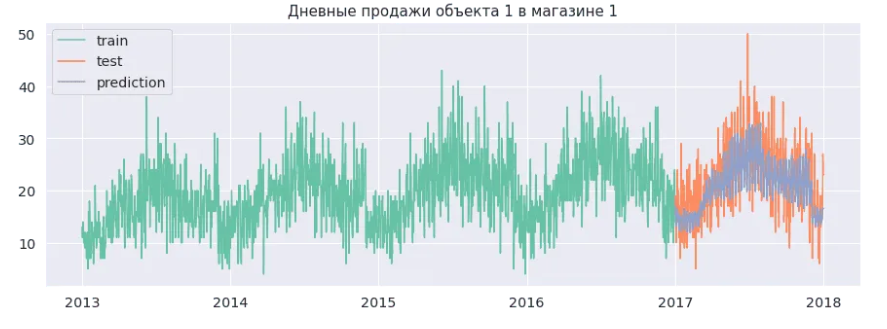









Основная идея данного подхода заключается в использовании известных значений временного ряда в качестве входных данных для регрессионной модели, которая выдаёт прогнозы на будущие периоды. При этом для моделирования временной зависимости можно использовать не весь ряд, а лишь последние $p$ значений. Таким образом, модель принимает вид:
$$
y_t = f(y_{t-1}, \dots, y_{t-p}),
$$
где $f$ — произвольная регрессионная функция. Эта функция может быть построена с помощью различных методов машинного обучения, таких как линейная регрессия, деревья решений, методы бустинга, сверточные и рекуррентные нейронные сети.

Рассмотрим далее, какие признаки (параметры) можно использовать для построения прогноза, подавая их на вход модели регрессии.


Приведём конкретный числовой пример прогнозирования временного ряда с использованием регрессионной модели.

**Постановка задачи:**
Предположим, у нас есть данные о месячных продажах товара за последние четыре года, с января 2013 по декабрь 2016 года (всего 48 значений). Задача — спрогнозировать продажи на 2017 год, используя последние $p = 3$ наблюдения для каждого прогноза.

**Данные (в тыс. единиц):**
- Продажи за октябрь, ноябрь и декабрь 2016 года составили $y_{45} = 120$, $y_{46} = 130$, и $y_{47} = 125$.

**Модель:**
Выберем модель линейной регрессии, чтобы прогнозировать продажи $y_{t}$ на основе трёх предыдущих значений:
$$
y_t = f(y_{t-1}, y_{t-2}, y_{t-3}) = \beta_0 + \beta_1 y_{t-1} + \beta_2 y_{t-2} + \beta_3 y_{t-3}.
$$

**Шаги решения:**
1. **Обучение модели**: Используем данные с января 2013 по декабрь 2016 для обучения линейной модели, получая коэффициенты $\beta_0$, $\beta_1$, $\beta_2$, и $\beta_3$.
2. **Прогнозирование**: После обучения модели находим прогноз на январь 2017 года ($y_{48}$) на основе значений за октябрь, ноябрь и декабрь 2016 года:
 $$
   \hat{y}_{48} = \beta_0 + \beta_1 \cdot y_{47} + \beta_2 \cdot y_{46} + \beta_3 \cdot y_{45}.
$$
   Подставляя значения, получаем, например, $\hat{y}_{48} = 10 + 0.5 \cdot 125 + 0.3 \cdot 130 + 0.2 \cdot 120 = 122.5$.
3. **Прогноз на следующие месяцы**: Используем полученное значение $\hat{y}_{48}$ и значения $y_{47}$, $y_{46}$ для прогнозирования $y_{49}$ (февраль 2017 года):
 $$
   \hat{y}_{49} = \beta_0 + \beta_1 \cdot \hat{y}_{48} + \beta_2 \cdot y_{47} + \beta_3 \cdot y_{46}.
$$
   Если, например, $\hat{y}_{48} = 122.5$, то $\hat{y}_{49} = 10 + 0.5 \cdot 122.5 + 0.3 \cdot 125 + 0.2 \cdot 130 = 123.75$.

Этот процесс продолжается для последующих месяцев, обновляя прогноз с учётом последних значений временного ряда, вплоть до получения прогнозов на весь 2017 год.




**Формирование признаков для прогнозирования временных рядов**

**Общий принцип выбора признаков**

При выборе признаков для построения модели прогнозирования временного ряда важно определить, какие данные доступны на момент прогнозирования. Для этого полезно визуализировать ряд на графике, обозначить момент времени $t$ и мысленно представить, какие данные мы располагаем в этот момент. На вход модели могут подаваться любые признаки, значения которых известны до времени $t$. Если данные поступают сразу, можно использовать все признаки, зависящие от значений временного ряда до момента $t$. Однако в реальных условиях часть данных может поступать с задержкой. Например, если данные обновляются раз в сутки, то на момент прогнозирования в полдень нам могут быть недоступны данные последних 12 часов.



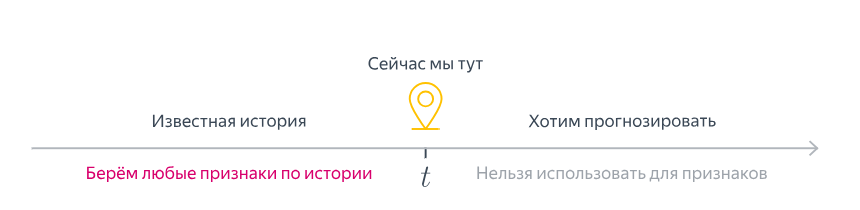


При построении модели важно учитывать горизонт прогнозирования — временной интервал, на который делается прогноз. Например, в задачах прогнозирования спроса на товары для логистического планирования необходимо учитывать время, требуемое для подготовки товара, доставки и выкладки на полки. Таким образом, прогнозирование должно быть завершено до начала формирования поставки, чтобы обеспечить наличие товара к моменту его размещения в магазине.

**Признаки, зависящие от даты**

Рассмотрим признаки, которые можно извлечь из заданной даты, например, 13 апреля 2021 года в 09:00. Из этой информации можно выделить следующие временные признаки:
- день недели: $2$ (вторник);
- месяц: $4$ (апрель);
- год: $2021$;
- сезон: весна;
- праздник: $0$ (не является праздничным);
- выходной: $0$ (не является выходным);
- час: $9$.

**Предыдущие значения ряда**

При прогнозировании значения ряда $y_t$ в момент времени $t$ можно использовать $p$ предыдущих значений ряда $y_{t-1}, \dots, y_{t-p}$ как признаки. Пример структуры данных:

| Время | Таргет $y_t$ | Признаки: $y_{t-1}, \ldots, y_{t-p}$ |
|-|-||
| $t$ | $y_t$        | $y_{t-1}, \dots, y_{t-p}$            |
| $t-1$ | $y_{t-1}$  | $y_{t-2}, \dots, y_{t-p-1}$         |
| $t-2$ | $y_{t-2}$  | $y_{t-3}, \dots, y_{t-p-2}$         |

В этом случае для прогнозирования значений можно выполнить сдвиг ряда на 1, 2, ..., $p$ шагов, чтобы получить предыдущие значения в качестве признаков. Например, для прогнозирования продаж 5 января (значение $y_t = 235$), мы можем использовать значения ряда за 4 января ($y_{t-1} = 230$) и 3 января ($y_{t-2} = 215$).

**Признаки скользящего окна**

Не всегда целесообразно использовать все предыдущие значения ряда в чистом виде, особенно если данные поступают с высокой частотой, например, раз в секунду. В этом случае можно агрегировать последние $p$ значений ряда, используя такие статистические показатели, как:
- среднее;
- взвешенное среднее;
- экспоненциальное сглаживание;
- медиана;
- минимум/максимум;
- стандартное отклонение.

Примеры применения признаков скользящего окна:
- средняя температура за последнюю неделю для прогнозирования температуры на завтра;
- средняя влажность за предыдущую неделю для прогнозирования температуры.

Если данные позволяют использовать стандартные методы для создания подобных признаков, можно воспользоваться готовыми инструментами. При отсутствии данных или их плохом качестве, стоит продумать способ обработки признаков в соответствии с особенностями задачи.



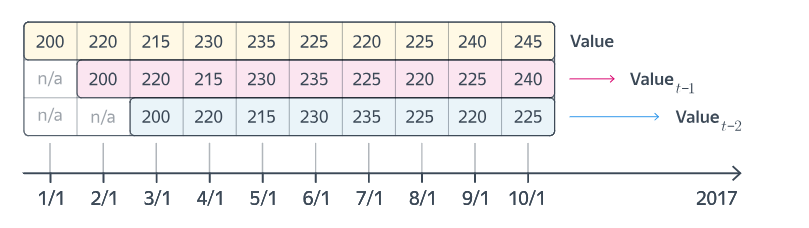


**Сезонные признаки**

Если временной ряд демонстрирует сезонность, можно использовать следующие сезонные признаки:
- значение переменной за сутки, неделю, месяц или год назад;
- сезонные компоненты, выделенные методами декомпозиции ряда.

Примеры сезонных признаков:
- температура год назад;
- средняя температура 23 ноября за последние пять лет;
- средняя температура на неделе, в которую входит 23 ноября, за последние пять лет.

**Категориальные признаки и счётчики**

Для прогнозирования можно также использовать категориальные признаки, отражающие особенности рассматриваемых данных. Например, при прогнозировании температуры в дни без ветра можно использовать среднюю температуру в такие дни по историческим данным. Возможна и комбинированная группировка, например, средняя температура в апреле в безветренные дни.

**Резюме**

Подведём итог о том, какие принципы необходимо учитывать при выборе признаков для модели:
- использовать только данные из прошлого, при этом важно учитывать возможные задержки в их поступлении;
- учитывать вычислительную сложность при большом числе признаков;
- при необходимости генерировать признаки на основе знаний предметной области.

Рассмотрим несколько конкретных примеров формирования признаков для задачи прогнозирования временного ряда.

### Пример 1: Прогнозирование спроса на товар

Допустим, у нас есть данные о продажах товара в магазине за последние 30 дней, и мы хотим спрогнозировать спрос на следующие несколько дней. Дата текущего прогноза — 30 января 2021 года, и известны продажи на предшествующие даты.

#### Данные:
Предположим, данные о продажах за последние дни составляют:
- 27 января — 200 единиц
- 28 января — 210 единиц
- 29 января — 190 единиц

Цель — спрогнозировать продажи на 31 января с использованием предыдущих данных.

#### Признаки:
1. **Временные признаки (на основе даты 30 января 2021 года):**
   - День недели: $\text{суббота}$ (или код: $6$)
   - Месяц: январь ($1$)
   - Выходной день: да (1)
   - Сезон: зима
   
   **Числовой вид признаков:** $\text{[день недели = 6, месяц = 1, выходной = 1, сезон = зима]}$

2. **Предыдущие значения временного ряда:** Используем последние 3 значения продаж.
   - Продажи за 27 января: $y_{27} = 200$
   - Продажи за 28 января: $y_{28} = 210$
   - Продажи за 29 января: $y_{29} = 190$

   **Числовой вид признаков:** $\text{[200, 210, 190]}$

3. **Скользящее окно (агрегированные признаки):**
   - Среднее значение продаж за последние 3 дня: $(200 + 210 + 190) / 3 = 200$
   - Максимальные продажи за последние 3 дня: $\max(200, 210, 190) = 210$
   - Минимальные продажи за последние 3 дня: $\min(200, 210, 190) = 190$
   - Стандартное отклонение: приблизительно 8.2

   **Числовой вид признаков:** $\text{[среднее = 200, максимум = 210, минимум = 190, стандартное отклонение ≈ 8.2]}$

4. **Сезонные признаки:** Продажи за аналогичный период в прошлом году.
   - Например, продажи за 30 января 2020 года были 205 единиц, а средние продажи за последние пять лет на конец января составляют 220 единиц.

   **Числовой вид признаков:** $\text{[205, 220]}$

На основе этих признаков можно обучить модель для прогнозирования спроса на товар.

### Пример 2: Прогнозирование температуры

Допустим, у нас есть данные о температуре воздуха на каждый день за последний год, и мы хотим спрогнозировать температуру на 15 апреля 2021 года.

#### Данные:
Температура за последние несколько дней:
- 12 апреля — 15°C
- 13 апреля — 16°C
- 14 апреля — 17°C

#### Признаки:
1. **Временные признаки (на основе даты 15 апреля 2021 года):**
   - День недели: четверг (код: $4$)
   - Месяц: апрель ($4$)
   - Сезон: весна
   
   **Числовой вид признаков:** $\text{[день недели = 4, месяц = 4, сезон = весна]}$

2. **Предыдущие значения временного ряда:** Температура за последние 3 дня:
   - 12 апреля: $y_{12} = 15$
   - 13 апреля: $y_{13} = 16$
   - 14 апреля: $y_{14} = 17$

   **Числовой вид признаков:** $\text{[15, 16, 17]}$

3. **Скользящее окно (агрегированные признаки):**
   - Средняя температура за последние 3 дня: $(15 + 16 + 17) / 3 = 16$
   - Минимальная температура за последние 3 дня: $\min(15, 16, 17) = 15$
   - Максимальная температура за последние 3 дня: $\max(15, 16, 17) = 17$

   **Числовой вид признаков:** $\text{[среднее = 16, минимум = 15, максимум = 17]}$

4. **Сезонные признаки:** Температура за аналогичный период в прошлом году:
   - Температура на 15 апреля 2020 года была 14°C.
   - Средняя температура за последние пять лет на эту дату: 15°C.

   **Числовой вид признаков:** $\text{[температура 15 апреля 2020 года = 14, средняя температура = 15]}$

Эти признаки используются для прогноза температуры на 15 апреля 2021 года.



Эти примеры показывают, как можно использовать временные признаки, предыдущие значения ряда, агрегированные признаки и сезонные данные для построения модели прогнозирования.


**Построение прогноза**

Определившись с выбором признаков, переходим к методам построения прогноза. Предположим, что требуется спрогнозировать значение временного ряда на $H$ шагов вперёд. Основные подходы для этого:

1. **Рекурсивная стратегия**
2. **Прямая стратегия**
3. **Гибридная стратегия**

### 1. Рекурсивная стратегия

В рекурсивной стратегии для каждого момента времени $t_0 \leq t \leq T$ создаются объекты обучающей выборки:
- **Признаки** — значения ряда до момента времени $t - 1$;
- **Целевая метка** — значение $y_t$.

По этим данным обучается регрессионная модель, которая строит прогноз на один шаг вперёд. Для прогноза на несколько шагов вперёд модель сначала делает прогноз на первый шаг. Этот прогноз затем используется для вычисления признаков следующего шага, на основе которых строится прогноз на второй шаг, и так далее.

Пример:
Если для прогнозирования $y_t$ признаки составляют $(y_{t-p}, \dots, y_{t-1})$, то для построения прогноза $y_{t+1}$ набор признаков обновится до $(y_{t-p+1}, \dots, y_{t-1}, \hat{y_t})$, где $\hat{y_t}$ — предсказанное значение.



















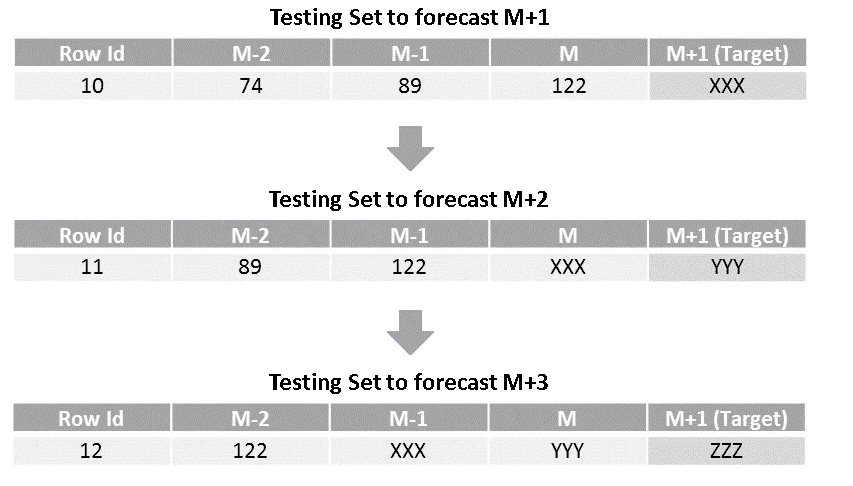

### Пример использования рекурсивной стратегии:

#### Задача:
Предсказать значения временного ряда $y_t$ (например, ежедневные продажи) на следующие 5 дней ($t+1, t+2, \dots, t+5$).

#### Данные:
Имеется временной ряд длиной 100 дней ($y_1, y_2, \dots, y_{100}$). Будем использовать последние 5 значений ряда ($y_{95}, y_{96}, y_{97}, y_{98}, y_{99}, y_{100}$) в качестве признаков для обучения модели.



### Шаги:

#### 1. **Обучение модели:**
1. **Формирование обучающей выборки:**
    - Признаки: $(y_{t-p}, \dots, y_{t-1})$, где $p = 5$ (количество предыдущих точек времени).
    - Целевая метка: $y_t$.

    Например, для $t = 6$:
    - Признаки: $(y_1, y_2, y_3, y_4, y_5)$.
    - Целевая метка: $y_6$.

    Для всего ряда ($y_1 \dots y_{100}$) формируем выборку:
    - $X = [(y_1, y_2, y_3, y_4, y_5), (y_2, y_3, y_4, y_5, y_6), \dots, (y_{95}, y_{96}, y_{97}, y_{98}, y_{99})]$,
    - $y = [y_6, y_7, \dots, y_{100}]$.

2. **Обучение регрессионной модели:**
    Используем, например, линейную регрессию, градиентный бустинг, или нейронную сеть для предсказания $y_t$ по признакам $(y_{t-p}, \dots, y_{t-1})$.



#### 2. **Прогнозирование на несколько шагов вперёд:**

##### Шаг 1: Прогноз на $t+1$:
- Имеем последние известные значения ряда: $y_{96}, y_{97}, y_{98}, y_{99}, y_{100}$.
- Подаём их в модель как признаки: $X = (y_{96}, y_{97}, y_{98}, y_{99}, y_{100})$.
- Модель выдаёт прогноз: $\hat{y_{101}}$.

##### Шаг 2: Прогноз на $t+2$:
- Формируем новые признаки: $(y_{97}, y_{98}, y_{99}, y_{100}, \hat{y_{101}})$.
- Подаём их в модель.
- Модель выдаёт прогноз: $\hat{y_{102}}$.

##### Шаг 3: Прогноз на $t+3$:
- Формируем новые признаки: $(y_{98}, y_{99}, y_{100}, \hat{y_{101}}, \hat{y_{102}})$.
- Подаём их в модель.
- Модель выдаёт прогноз: $\hat{y_{103}}$.

##### Шаги 4 и 5:
Повторяем процесс, обновляя признаки и используя предыдущие прогнозы ($\hat{y_{t+1}}, \hat{y_{t+2}}, \dots$).



### Итог:

Прогнозы на 5 шагов вперёд:
$$
\hat{y_{101}}, \hat{y_{102}}, \hat{y_{103}}, \hat{y_{104}}, \hat{y_{105}}
$$



### Преимущества и недостатки:

- **Преимущества:** Простота реализации, подходит для многих моделей.
- **Недостатки:** Ошибки накапливаются, так как каждый следующий прогноз зависит от предыдущего.

Mean Squared Error (MSE) on Test Data: 0.0491
Forecast for the next 5 steps: [0.23645679087944388, 0.5630782622974343, 0.8061874346334168, 0.8274207462406507, 0.608196668888932]


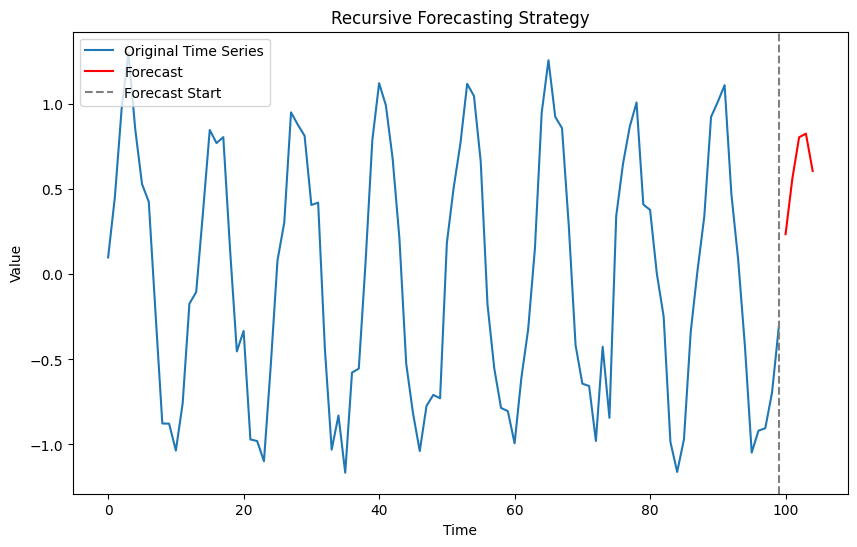

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Генерация синтетического временного ряда
np.random.seed(42)
time_series = np.sin(np.linspace(0, 50, 100)) + np.random.normal(scale=0.2, size=100)  # Данные

# Гиперпараметры
p = 5  # Количество предыдущих шагов для признаков
forecast_horizon = 5  # Прогнозируемые шаги

# Формирование обучающей выборки
def create_dataset(series, p):
    X, y = [], []
    for t in range(len(series) - p):
        X.append(series[t:t+p])
        y.append(series[t+p])
    return np.array(X), np.array(y)

# Создание признаков и целевой метки
X, y = create_dataset(time_series, p)

# Разделение на обучающую и тестовую выборки
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Прогноз на тестовой выборке (на один шаг вперёд)
y_pred = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE) on Test Data: {mse:.4f}")

# Рекурсивный прогноз на несколько шагов вперёд
def recursive_forecast(model, last_values, horizon):
    predictions = []
    current_input = last_values.copy()
    for _ in range(horizon):
        pred = model.predict(current_input.reshape(1, -1))[0]
        predictions.append(pred)
        current_input = np.append(current_input[1:], pred)  # Обновление входных данных
    return predictions

# Последние известные значения для старта прогноза
last_known_values = time_series[-p:]

# Прогноз на 5 шагов вперёд
forecast = recursive_forecast(model, last_known_values, forecast_horizon)
print(f"Forecast for the next {forecast_horizon} steps: {forecast}")

# Визуализация
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(len(time_series)), time_series, label="Original Time Series")
plt.plot(range(len(time_series), len(time_series) + forecast_horizon), forecast, label="Forecast", color="red")
plt.axvline(x=len(time_series) - 1, linestyle="--", color="gray", label="Forecast Start")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Recursive Forecasting Strategy")
plt.show()



### 2. Прямая стратегия

В прямой стратегии каждая модель строит прогноз для одного конкретного шага в пределах горизонта прогнозирования. Для этого создаются $H$ отдельных моделей прогнозирования, по одной для каждого момента $t_0 \leq t \leq t_0 + H - 1$.

- **Признаки** — одинаковый набор значений ряда до момента времени $t_0 - 1$ для каждой из моделей.
- **Целевая метка** — конкретное значение $y_{t}$ для каждого момента прогнозирования.

Преимущество прямой стратегии — независимость моделей, что позволяет избежать накопления ошибки, как в рекурсивной стратегии. Однако такой метод требует обучения отдельной модели для каждого прогнозируемого шага, что увеличивает вычислительные затраты.



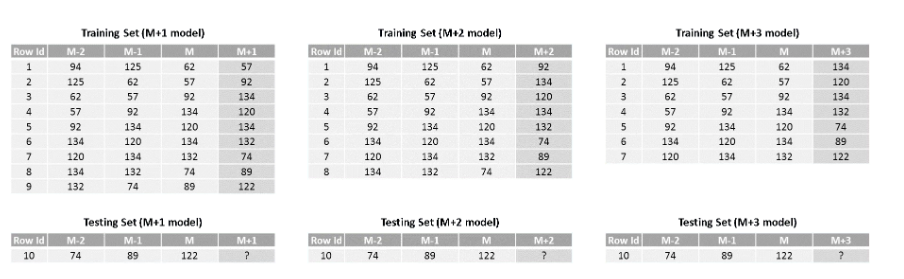

### Пример числовой реализации прямой стратегии

#### Задача:
Предсказать значения временного ряда $y_t$ (например, ежедневные продажи) на следующие 3 дня ($t+1, t+2, t+3$) с использованием прямой стратегии.


### Исходные данные:
Имеется временной ряд длиной 10 дней:  
$$ y = [10, 12, 11, 13, 15, 14, 17, 16, 18, 19] $$  

Будем использовать последние $p = 3$ значения временного ряда для формирования признаков.  
Прогнозируемый горизонт: $H = 3$ (модели для $t+1, t+2, t+3$).


### Шаги:

#### **1. Формирование обучающей выборки**
Для каждой модели ($t+1, t+2, t+3$):
- Признаки: Последние $p$ значений временного ряда ($y_{t-p}, \dots, y_{t-1}$).
- Целевая метка:
  - $y_{t+1}$: Модель для предсказания на 1 шаг вперёд.
  - $y_{t+2}$: Модель для предсказания на 2 шага вперёд.
  - $y_{t+3}$: Модель для предсказания на 3 шага вперёд.


#### **2. Конкретные признаки и целевые метки**

**Формируем обучающую выборку:**
- Для $t+1$ (модель 1):
  - Признаки: $[10, 12, 11], [12, 11, 13], [11, 13, 15], [13, 15, 14], [15, 14, 17], [14, 17, 16], [17, 16, 18]$
  - Целевая метка: $[13, 15, 14, 17, 16, 18, 19]$

- Для $t+2$ (модель 2):
  - Признаки: $[10, 12, 11], [12, 11, 13], [11, 13, 15], [13, 15, 14], [15, 14, 17], [14, 17, 16]$
  - Целевая метка: $[15, 14, 17, 16, 18, 19]$

- Для $t+3$ (модель 3):
  - Признаки: $[10, 12, 11], [12, 11, 13], [11, 13, 15], [13, 15, 14], [15, 14, 17]$
  - Целевая метка: $[14, 17, 16, 18, 19]$


#### **3. Построение моделей**
Обучаем три разные модели регрессии (например, линейные модели) для $t+1$, $t+2$, $t+3$ с соответствующими наборами данных.


#### **4. Прогнозирование**
Для прогноза берём последние известные значения временного ряда ($y_8, y_9, y_{10} = [16, 18, 19]$):
- Модель $t+1$: Прогнозирует $\hat{y}_{11}$ на основе $[16, 18, 19]$.
- Модель $t+2$: Прогнозирует $\hat{y}_{12}$ на основе $[16, 18, 19]$.
- Модель $t+3$: Прогнозирует $\hat{y}_{13}$ на основе $[16, 18, 19]$.


### Итог:

- Прогнозируемые значения:  
$$
  \hat{y}_{11}, \hat{y}_{12}, \hat{y}_{13}
$$



### Преимущества:
- Независимость моделей предотвращает накопление ошибок.
- Более точные прогнозы для каждого шага.

### Недостатки:
- Требуется обучение $H$ отдельных моделей.
- Увеличиваются вычислительные затраты.

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Исходный временной ряд
y = np.array([10, 12, 11, 13, 15, 14, 17, 16, 18, 19])

# Гиперпараметры
p = 3  # Количество шагов в прошлом
H = 3  # Горизонт прогнозирования

# Формирование выборки
def create_direct_strategy_dataset(series, p, horizon):
    datasets = []
    for h in range(1, horizon + 1):
        X, y = [], []
        for t in range(len(series) - p - h + 1):
            X.append(series[t:t+p])
            y.append(series[t+p+h-1])
        datasets.append((np.array(X), np.array(y)))
    return datasets

# Создание наборов данных для каждой модели
datasets = create_direct_strategy_dataset(y, p, H)

# Обучение моделей
models = []
for h in range(H):
    X, y = datasets[h]
    model = LinearRegression()
    model.fit(X, y)
    models.append(model)

# Прогнозирование
last_values = y[-p:]  # Последние известные значения ряда
forecasts = [model.predict(last_values.reshape(1, -1))[0] for model in models]

print(f"Прогноз на следующие {H} шага: {forecasts}")

Прогноз на следующие 3 шага: [18.8986013986014, 20.578879863189393, 20.640449438202246]


### 3. Гибридная стратегия

Гибридная стратегия сочетает принципы рекурсивной и прямой стратегий. Здесь также создаются $H$ моделей, но каждая последующая модель использует прогнозы предыдущих моделей как признаки, что позволяет учитывать предсказания предыдущих шагов при построении прогноза.

Порядок построения моделей:
- Модель для прогноза на 1 шаг вперёд.
- Модель для прогноза на 2 шага вперёд, которая использует прогноз предыдущей модели на 1 шаг.
- Модель для прогноза на 3 шага вперёд, использующая прогнозы на 1 и 2 шага в качестве признаков.

При этом каждая модель включает:
- Историю ряда до момента времени $t_0 - 1$;
- Прогнозы предыдущих моделей для моментов $t_0, t_0 - 1, \dots, t - 1$.
















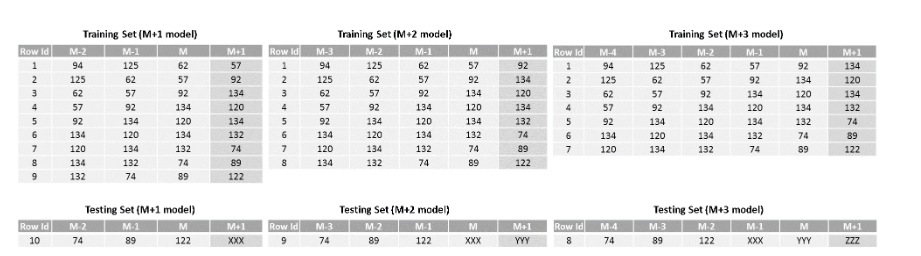

### Пример числовой реализации гибридной стратегии

#### Задача:
Предсказать значения временного ряда $y_t$ на следующие 3 дня ($t+1, t+2, t+3$) с использованием гибридной стратегии.



### Исходные данные:
Имеется временной ряд длиной 10 дней:  
\[
y = [10, 12, 11, 13, 15, 14, 17, 16, 18, 19]
\]

Будем использовать последние $p = 3$ значения временного ряда для формирования признаков.  
Прогнозируемый горизонт: $H = 3$.



### Шаги:

#### **1. Формирование обучающей выборки**
Для каждой модели ($t+1, t+2, t+3$):
- **Модель для $t+1$**:
  - Признаки: История ряда $[y_{t-p}, \dots, y_{t-1}]$.
  - Целевая метка: $y_{t+1}$.

- **Модель для $t+2$**:
  - Признаки: История ряда $[y_{t-p}, \dots, y_{t-1}]$ + прогноз модели $t+1$ ($\hat{y}_{t+1}$).
  - Целевая метка: $y_{t+2}$.

- **Модель для $t+3$**:
  - Признаки: История ряда $[y_{t-p}, \dots, y_{t-1}]$ + прогнозы $\hat{y}_{t+1}, \hat{y}_{t+2}$.
  - Целевая метка: $y_{t+3}$.



#### **2. Конкретные признаки и целевые метки**

- Для $t+1$:  
  Признаки: $[10, 12, 11], [12, 11, 13], [11, 13, 15], [13, 15, 14], [15, 14, 17], [14, 17, 16], [17, 16, 18]$  
  Целевая метка: $[13, 15, 14, 17, 16, 18, 19]$

- Для $t+2$:  
  Признаки: $[10, 12, 11, \hat{y}_1], [12, 11, 13, \hat{y}_2], [11, 13, 15, \hat{y}_3], \dots$  
  Целевая метка: $[15, 14, 17, 16, 18, 19]$

- Для $t+3$:  
  Признаки: $[10, 12, 11, \hat{y}_1, \hat{y}_2], [12, 11, 13, \hat{y}_2, \hat{y}_3], \dots$  
  Целевая метка: $[14, 17, 16, 18, 19]$

Здесь $\hat{y}_1, \hat{y}_2, \dots$ — прогнозы предыдущих моделей.



#### **3. Построение моделей**
Три модели обучаются последовательно:
- Модель $t+1$: обучается только на истории временного ряда.
- Модель $t+2$: обучается на истории временного ряда и прогнозе $\hat{y}_{t+1}$.
- Модель $t+3$: обучается на истории временного ряда и прогнозах $\hat{y}_{t+1}, \hat{y}_{t+2}$.






### Преимущества гибридной стратегии:
1. Учитывает прошлую историю ряда, как в рекурсивной стратегии.
2. Учитывает прогнозы предыдущих шагов, как в прямой стратегии.
3. Уменьшает накопление ошибок за счёт построения отдельных моделей.

### Недостатки:
1. Увеличиваются вычислительные затраты, так как требуется $H$ моделей.
2. Возможен перенос ошибки из предыдущих шагов.


### Реализация на Python

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Данные
y = np.array([10, 12, 11, 13, 15, 14, 17, 16, 18, 19])
p = 3  # Количество лагов для признаков
H = 3  # Горизонт прогнозирования

# Функция для формирования обучающей выборки
def create_dataset(y, p, horizon):
    X, Y = [], []
    for t in range(len(y) - p - horizon + 1):
        X.append(y[t:t + p])
        Y.append(y[t + p:t + p + horizon])
    return np.array(X), np.array(Y)

# Формируем обучающую выборку
X, Y = create_dataset(y, p, H)

# Инициализируем модели
models = [LinearRegression() for _ in range(H)]

# Список для хранения прогнозов
predictions = []

# Обучение моделей и прогнозирование
for h in range(H):
    # Формируем данные для текущей модели
    if h == 0:
        X_h = X.copy()  # Для модели t+1 используем исходные признаки
    else:
        # Для последующих моделей добавляем прогнозы
        X_h = []
        for t in range(len(X)):
            extended_features = np.append(X[t], predictions[t, :h])
            X_h.append(extended_features)
        X_h = np.array(X_h)

    # Обучаем текущую модель
    models[h].fit(X_h, Y[:, h])

    # Прогнозируем на обучающей выборке
    preds = models[h].predict(X_h)
    if h == 0:
        predictions = np.expand_dims(preds, axis=1)
    else:
        predictions = np.hstack((predictions, np.expand_dims(preds, axis=1)))

# Вывод результатов
print("Прогнозы для каждого шага:")
for h in range(H):
    print(f"Модель t+{h+1}: {predictions[:, h]}")

# Прогнозирование на новых данных
print("\nПример прогноза на новые данные:")
new_data = np.array([17, 16, 18])  # Последние известные значения
forecast = []
for h in range(H):
    # Формируем признаки
    if h > 0:
        new_data = np.append(new_data, forecast)

    # Прогнозируем
    pred = models[h].predict(new_data[:p + h].reshape(1, -1))
    forecast.append(pred[0])

print(f"Прогноз на следующие {H} дня: {forecast}")

Прогнозы для каждого шага:
Модель t+1: [13.80337079 14.34269663 13.78089888 16.41573034 16.65730337]
Модель t+2: [14.375  14.5625 17.3125 16.6875 17.4375]
Модель t+3: [14. 17. 16. 18. 19.]

Пример прогноза на новые данные:
Прогноз на следующие 3 дня: [18.69662921348315, 18.75, 27.561797752808857]




### Вопрос истинных и предсказанных значений

Важный момент: при обучении можно использовать либо истинные значения, либо прогнозы предыдущих моделей. Использование истинных значений повышает точность модели, однако в реальной работе модели будут использовать предсказания, которые могут отличаться по распределению от истинных данных. Это может привести к накоплению ошибки и увеличению дисперсии последующих прогнозов.


Рассмотрим числовой пример для каждого подхода прогнозирования, используя временной ряд продаж товара. Допустим, у нас есть данные о продажах за последние 7 дней: $y = [100, 105, 110, 115, 120, 130, 135]$, и мы хотим спрогнозировать продажи на 3 дня вперёд ($H = 3$).

### 1. Рекурсивная стратегия
Сначала обучим модель прогнозирования на один шаг вперёд. Допустим, мы используем последние два значения как признаки для предсказания следующего значения (например, линейную регрессию).

**Пошаговый прогноз**:
- **Шаг 1**: Прогнозируем $y_8$ на основе $y_6$ и $y_7$:
$$
  y_8 = f(y_6, y_7) = f(120, 135) \approx 140
  $$
- **Шаг 2**: Прогнозируем $y_9$ на основе $y_7$ и $\hat{y}_8$:
$$
  y_9 = f(y_7, \hat{y}_8) = f(135, 140) \approx 145
  $$
- **Шаг 3**: Прогнозируем $y_{10}$ на основе $\hat{y}_8$ и $\hat{y}_9$:
$$
  y_{10} = f(\hat{y}_8, \hat{y}_9) = f(140, 145) \approx 150
  $$

**Итоговый прогноз**: $[140, 145, 150]$ на три дня вперёд.

### 2. Прямая стратегия
В этом подходе создаём три разные модели для прогнозирования каждого конкретного дня ($y_8$, $y_9$, $y_{10}$).

**Пример прогноза**:
- **Прогноз $y_8$**: Модель для $y_8$ прогнозирует следующий день, используя признаки $y_6$ и $y_7$:
$$
  y_8 = f_1(y_6, y_7) = f_1(120, 135) \approx 140
  $$
- **Прогноз $y_9$**: Модель для $y_9$ использует также $y_6$ и $y_7$:
$$
  y_9 = f_2(y_6, y_7) = f_2(120, 135) \approx 143
  $$
- **Прогноз $y_{10}$**: Модель для $y_{10}$ прогнозирует третий день вперёд, используя те же признаки:
$$
  y_{10} = f_3(y_6, y_7) = f_3(120, 135) \approx 147
  $$

**Итоговый прогноз**: $[140, 143, 147]$.

### 3. Гибридная стратегия
Создаются три модели, как в прямой стратегии, но при этом каждая следующая модель использует предсказания предыдущих моделей.

**Пример прогноза**:
- **Шаг 1 (прогноз $y_8$)**:
$$
  y_8 = f_1(y_6, y_7) = f_1(120, 135) \approx 140
  $$
- **Шаг 2 (прогноз $y_9$)**: Модель для $y_9$ использует $y_6$, $y_7$ и прогноз $\hat{y}_8$:
$$
  y_9 = f_2(y_6, y_7, \hat{y}_8) = f_2(120, 135, 140) \approx 144
  $$
- **Шаг 3 (прогноз $y_{10}$)**: Модель для $y_{10}$ использует $y_6$, $y_7$, $\hat{y}_8$, $\hat{y}_9$:
$$
  y_{10} = f_3(y_6, y_7, \hat{y}_8, \hat{y}_9) = f_3(120, 135, 140, 144) \approx 148
  $$

**Итоговый прогноз**: $[140, 144, 148]$.

### Итоговая таблица прогнозов
| День         | Рекурсивный прогноз | Прямой прогноз | Гибридный прогноз |
|--|-|-|--|
| $y_8$    | 140                  | 140            | 140               |
| $y_9$    | 145                  | 143            | 144               |
| $y_{10}$ | 150                  | 147            | 148               |


### Модели для множества временных рядов

#### Задача

В реальных задачах, таких как управление большими системами данных, часто требуется прогнозировать значения для множества временных рядов. Эти ряды могут описывать поведение совершенно разных процессов. Например:

- **Прогнозирование температуры**: Предсказание температуры для каждого города в определенном регионе.
- **Прогнозирование продаж**: Оценка будущего спроса на 500+ категорий товаров в супермаркете.



### Проблема

При большом количестве временных рядов возникают сложности:

1. **Индивидуальные модели для каждого ряда**:
   - Если обучать отдельную модель на каждый временной ряд, затраты ресурсов резко возрастают.
   - Например, для 1000 временных рядов обучение займёт недели даже на мощных серверах.
   - Поддержка такого количества моделей также становится неуправляемой.

2. **Одна модель для всех рядов**:
   - Общая модель для всех данных часто не может учитывать особенности отдельных временных рядов.
   - Пример: модель может хорошо предсказать продажи товаров с регулярной сезонностью, но будет ошибаться для товаров с нерегулярными всплесками спроса.

Результат: либо низкая точность, либо высокая стоимость вычислений.



### Решение: Группировка временных рядов и обучение моделей для групп

Чтобы сбалансировать точность и вычислительную эффективность, можно разделить временные ряды на группы (кластеры) и обучить отдельную модель для каждой группы.



### Алгоритм подхода

1. **Анализ временных рядов**:
   - Сначала анализируются характеристики каждого временного ряда:
     - **Тренд**: общий рост или спад (например, спрос на электронику постепенно растет).
     - **Сезонность**: регулярные циклы (например, пиковый спрос на мороженое летом).
     - **Волатильность**: степень колебаний значений (например, цена акций).

   Пример:  
   Рассмотрим два ряда:  
   - **Ряд 1**: Продажи мороженого с ярко выраженной сезонностью.  
   - **Ряд 2**: Продажи электроники с устойчивым ростом.  
   Эти ряды должны быть в разных группах, так как имеют разные закономерности.

2. **Кластеризация временных рядов**:
   - Используются методы кластеризации, такие как K-means или DBSCAN, чтобы разделить ряды на группы.
   - Для кластеризации можно использовать признаки:
     - Средний уровень сезонности.
     - Среднеквадратичное отклонение.
     - Коэффициент корреляции автокорреляции (ACF).
   - Пример: 1000 рядов разбиваются на 5 групп:
     - Группа 1: Ряды с годовой сезонностью.
     - Группа 2: Ряды с ярко выраженным ростом.
     - Группа 3: Ряды с сильной волатильностью.

3. **Обучение моделей для каждой группы**:
   - Для каждой группы создается и обучается отдельная модель.
   - Пример моделей:
     - **SARIMA** для рядов с ярко выраженной сезонностью.
     - **Prophet** для рядов с трендом и слабой сезонностью.
     - **LSTM** или **XGBoost** для сложных нелинейных зависимостей.

4. **Прогнозирование**:
   - Для каждого ряда используется модель, соответствующая группе, в которую он попал.



### Примеры реализации

#### Пример 1: Прогнозирование температуры
- **Данные**: У нас есть температуры за 5 лет для 1000 городов.
- **Задача**: Предсказать температуру на следующие 7 дней.
- **Решение**:
  1. **Анализ**: Расчёт сезонности и трендов для каждого ряда.
  2. **Кластеризация**:
     - Группа 1: Города с сильной годовой сезонностью (например, северные города).
     - Группа 2: Города с низкой сезонностью (например, тропические города).
  3. **Модели**:
     - Для группы 1 используется SARIMA.
     - Для группы 2 – линейная регрессия.
  4. **Результаты**:
     - Ошибка предсказания (MAE): 2.5°C для модели с группами (против 4°C у общей модели).

#### Пример 2: Прогнозирование продаж товаров
- **Данные**: Продажи 500 категорий товаров в супермаркете за 1 год.
- **Задача**: Предсказать продажи на следующие 30 дней.
- **Решение**:
  1. **Анализ**:
     - Рассчитаны тренды, сезонность, волатильность.
  2. **Кластеризация**:
     - Группа 1: Товары с ярко выраженной сезонностью (например, подарки, мороженое).
     - Группа 2: Товары с равномерным спросом (например, молочные продукты).
     - Группа 3: Товары с редкими, но резкими всплесками спроса (например, бытовая техника).
  3. **Модели**:
     - Группа 1: SARIMA.
     - Группа 2: Линейная регрессия.
     - Группа 3: Леса решений (Random Forest).
  4. **Результаты**:
     - Средняя ошибка (MAE): 7 единиц (против 12 единиц у общей модели).



### Преимущества подхода

1. **Экономия вычислительных ресурсов**:
   - Вместо 500 отдельных моделей обучается, например, 5 моделей для групп.

2. **Сохранение точности**:
   - Модели для групп учитывают общие закономерности, что повышает точность по сравнению с одной общей моделью.

3. **Масштабируемость**:
   - При добавлении новых рядов их можно быстро отнести в соответствующую группу и использовать уже обученную модель.



### Инструменты для реализации

- **Кластеризация**: Scikit-learn (K-means, DBSCAN), PyCaret.
- **Модели временных рядов**:
  - SARIMA, Prophet – для сезонных рядов.
  - LSTM, XGBoost – для сложных зависимостей.
- **Визуализация и анализ данных**:
  - Matplotlib, Seaborn для графиков временных рядов.
  - PCA для уменьшения размерности признаков перед кластеризацией.



Этот подход позволяет эффективно управлять большим количеством временных рядов, минимизируя затраты ресурсов и сохраняя высокую точность прогнозов.

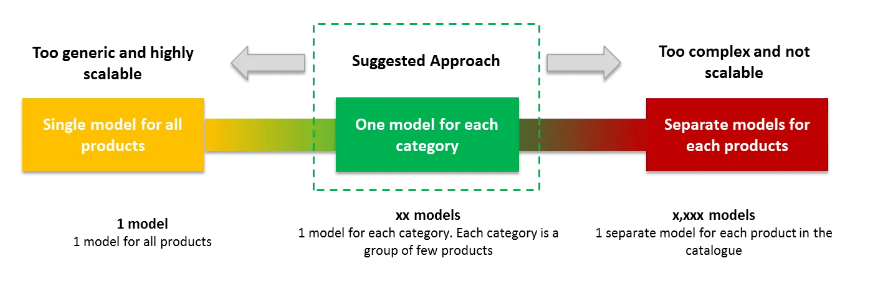


### Оценка качества моделей

Для оценки качества моделей прогнозирования временных рядов обычно используются метрики, характерные для задач регрессии.

1. **Средняя квадратичная ошибка (MSE)**

   Средняя квадратичная ошибка измеряет среднее значение квадрата отклонений предсказанных значений от истинных. Формула для её расчёта:

 $$
   \text{MSE} = \frac{1}{T - R + 1} \sum_{t=R}^{T} ( \hat{y}_t - y_t )^2
$$

   где:
   - $\hat{y}_t$ — предсказанное значение,
   - $y_t$ — истинное значение,
   - $T$ — конец периода,
   - $R$ — начало периода.

   MSE позволяет оценить, на сколько в среднем ошибка прогноза отклоняется от реального значения в квадрате.

2. **Средняя абсолютная ошибка (MAE)**

   Средняя абсолютная ошибка вычисляется как среднее абсолютное отклонение предсказанных значений от реальных:

 $$
   \text{MAE} = \frac{1}{T - R + 1} \sum_{t=R}^{T} | \hat{y}_t - y_t |
$$

   MAE даёт более интуитивно понятное представление о точности прогноза, поскольку измеряет ошибку в тех же единицах, что и сам временной ряд (например, в рублях или в количестве товара).

3. **Средняя абсолютная ошибка в процентах (MAPE)**

   Средняя абсолютная ошибка в процентах показывает среднее значение относительной ошибки прогноза:

 $$
   \text{MAPE} = \frac{100}{T - R + 1} \sum_{t=R}^{T} \left| \frac{\hat{y}_t - y_t}{y_t} \right|
$$

   MAPE полезна для оценки точности прогноза в относительных величинах, особенно если важно понимать процентное отклонение.

4. **Взвешенная средняя ошибка в процентах (WAPE)**

   Взвешенная средняя ошибка в процентах используется для оценки ошибки с учётом величины самого ряда:

 $$
   \text{WAPE} = 100 \cdot \frac{\sum_{t=R}^{T} | \hat{y}_t - y_t |}{\sum_{t=R}^{T} | y_t |}
$$

   Эта метрика полезна, когда важно учитывать масштаб ряда, так как она нормализует ошибку по отношению к общей сумме значений.

**Применение этих метрик** позволяет оценить качество прогнозов как в абсолютных, так и в относительных величинах. Они особенно полезны, поскольку не зависят от шкалы измерений и позволяют корректно оценивать модель независимо от единиц измерения.


### Кросс-валидация для временных рядов

Стандартные схемы кросс-валидации не применимы для временных рядов, поскольку значения временных рядов нельзя перемешивать — они подчиняются хронологическому порядку. Для оценки качества моделей на временных рядах разработаны специализированные методы кросс-валидации. Рассмотрим два распространённых способа.

#### Схема 1: Нарастающая кросс-валидация

1. Обучаем модель на первых $t$ значениях временного ряда $y_1, \ldots, y_t$ и прогнозируем следующие $\Delta t$ значений $\hat{y}_{t+1}, \ldots, \hat{y}_{t+\Delta t}$.
2. Обучаем модель на первых $t + \Delta t$ значениях $y_1, \ldots, y_{t+\Delta t}$ и прогнозируем $\hat{y}_{t+\Delta t+1}, \ldots, \hat{y}_{t+2\Delta t}$.
3. Повторяем шаги 1 и 2 для всех $k$ итераций, где $k$ — количество шагов в кросс-валидации.
4. На каждом шаге считаем ошибку прогноза и усредняем результаты.

**Примечание:** В этой схеме обучающее множество постепенно увеличивается, включая новые данные на каждом шаге.




















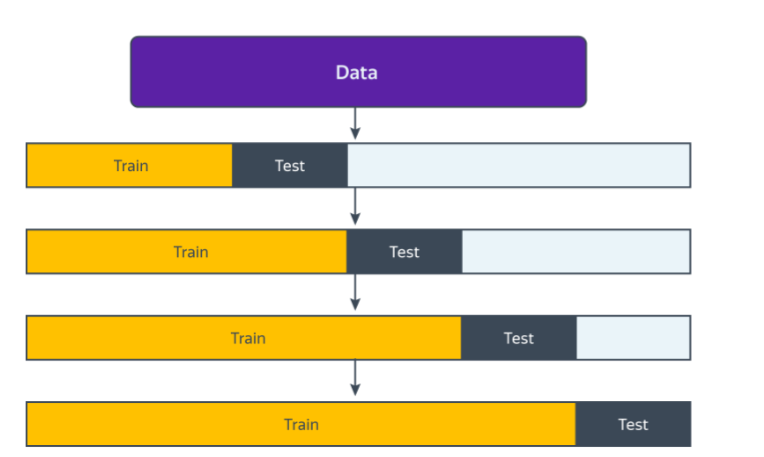

#### Схема 2: Скользящая кросс-валидация

1. Обучаем модель на первых $t$ значениях временного ряда $y_1, \ldots, y_t$ и прогнозируем следующие $\Delta t$ значений $\hat{y}_{t+1}, \ldots, \hat{y}_{t+\Delta t}$.
2. Обучаем модель на данных с $t + \Delta t$ по $t + 2\Delta t$ ($y_{t+\Delta t}, \ldots, y_{t+2\Delta t}$) и прогнозируем $\hat{y}_{t+2\Delta t+1}, \ldots, \hat{y}_{t+3\Delta t}$.
3. Повторяем шаги 1 и 2 для всех $k$ итераций.
4. Ошибки считаются и усредняются.

**Примечание:** В данной схеме размер обучающего множества остаётся постоянным, а само множество сдвигается во времени.



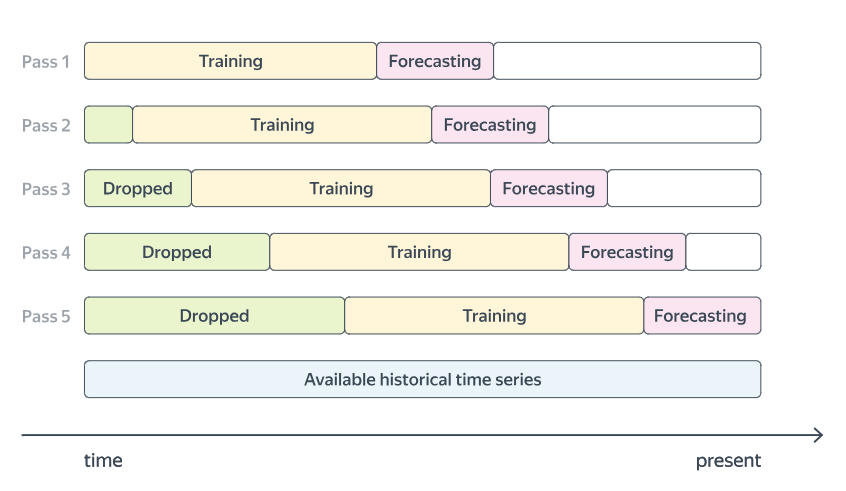



### Сравнение схем

Обе схемы отличаются подходом к размеру обучающего множества:
- В **схеме 1** размер обучающего множества растёт с каждым шагом, что позволяет использовать все доступные данные.
- В **схеме 2** размер обучающего множества остаётся постоянным, а сами данные сдвигаются. Эта схема полезна для ситуаций, когда необходимо поддерживать стабильный объём данных, например, при онлайн-обучении модели.

### Когда использовать какую схему?

Выбор схемы зависит от конкретной задачи:
- **Схема 1** лучше подходит, если данных достаточно много и вы хотите использовать все доступные данные для обучения. Это предпочтительный вариант в случае, когда важно, чтобы модель использовала весь исторический контекст.
- **Схема 2** может быть полезна, если данных ограничено или если модель должна работать в условиях онлайн-обучения, где нужно поддерживать фиксированный объём обучающих данных.

**Важно:** В обоих случаях размер тестового интервала времени остаётся фиксированным, чтобы избежать искажения метрик. Это критично, так как распределение метрик может варьироваться в зависимости от объёма используемых данных.




Для того чтобы проиллюстрировать оба метода кросс-валидации на временных рядах, рассмотрим простой числовой пример. Пусть у нас есть временной ряд данных о продажах товара за 10 дней:

$$ y = [10, 12, 13, 14, 15, 16, 17, 18, 19, 20] $$

Задача — прогнозировать будущие значения с помощью кросс-валидации. В качестве шагов прогнозирования возьмём $\Delta t = 1$ (то есть прогнозируем одно значение вперёд).

### Схема 1: Нарастающая кросс-валидация

1. **Первая итерация:**
   - Обучаем модель на первых $t = 5$ значениях $y_1, \ldots, y_5$: $[10, 12, 13, 14, 15]$.
   - Прогнозируем $\hat{y}_6$ (прогнозируем $y_6$): модель обучена на первых 5 значениях, прогнозируем 6-й (значение для 16).

   Прогноз: $\hat{y}_6 = 16$ (например, модель предсказала значение 16).

2. **Вторая итерация:**
   - Обучаем модель на первых $t + \Delta t = 6$ значениях: $[10, 12, 13, 14, 15, 16]$.
   - Прогнозируем $\hat{y}_7$: модель обучена на первых 6 значениях, прогнозируем 7-й (значение для 17).

   Прогноз: $\hat{y}_7 = 17$.

3. **Третья итерация:**
   - Обучаем модель на первых $t + 2\Delta t = 7$ значениях: $[10, 12, 13, 14, 15, 16, 17]$.
   - Прогнозируем $\hat{y}_8$: модель обучена на 7 значениях, прогнозируем 8-й (значение для 18).

   Прогноз: $\hat{y}_8 = 18$.

4. **Четвёртая итерация:**
   - Обучаем модель на первых $t + 3\Delta t = 8$ значениях: $[10, 12, 13, 14, 15, 16, 17, 18]$.
   - Прогнозируем $\hat{y}_9$: модель обучена на 8 значениях, прогнозируем 9-й (значение для 19).

   Прогноз: $\hat{y}_9 = 19$.

5. **Пятая итерация:**
   - Обучаем модель на первых $t + 4\Delta t = 9$ значениях: $[10, 12, 13, 14, 15, 16, 17, 18, 19]$.
   - Прогнозируем $\hat{y}_{10}$: модель обучена на 9 значениях, прогнозируем 10-й (значение для 20).

   Прогноз: $\hat{y}_{10} = 20$.

Итак, в случае с нарастающей кросс-валидацией на каждом шаге обучающее множество увеличивается, и прогнозируемые значения — $\hat{y}_6, \hat{y}_7, \hat{y}_8, \hat{y}_9, \hat{y}_{10}$ — получаются на основе расширенного обучающего набора.

### Схема 2: Скользящая кросс-валидация

1. **Первая итерация:**
   - Обучаем модель на первых $t = 5$ значениях $y_1, \ldots, y_5$: $[10, 12, 13, 14, 15]$.
   - Прогнозируем $\hat{y}_6$ (прогнозируем $y_6$): модель обучена на первых 5 значениях, прогнозируем 6-й (значение для 16).

   Прогноз: $\hat{y}_6 = 16$.

2. **Вторая итерация:**
   - Обучаем модель на следующих $t + \Delta t = 6$ значениях, начиная с $y_2$: $[12, 13, 14, 15, 16, 17]$.
   - Прогнозируем $\hat{y}_7$ (значение для 17).

   Прогноз: $\hat{y}_7 = 17$.

3. **Третья итерация:**
   - Обучаем модель на следующих 6 значениях, начиная с $y_3$: $[13, 14, 15, 16, 17, 18]$.
   - Прогнозируем $\hat{y}_8$ (значение для 18).

   Прогноз: $\hat{y}_8 = 18$.

4. **Четвёртая итерация:**
   - Обучаем модель на следующих 6 значениях, начиная с $y_4$: $[14, 15, 16, 17, 18, 19]$.
   - Прогнозируем $\hat{y}_9$ (значение для 19).

   Прогноз: $\hat{y}_9 = 19$.

5. **Пятая итерация:**
   - Обучаем модель на следующих 6 значениях, начиная с $y_5$: $[15, 16, 17, 18, 19, 20]$.
   - Прогнозируем $\hat{y}_{10}$ (значение для 20).

   Прогноз: $\hat{y}_{10} = 20$.

В случае скользящей кросс-валидации размер обучающего множества остаётся фиксированным (5 значений), но сами данные сдвигаются на один шаг на каждой итерации.

### Сравнение схем

- В **схеме 1** (нарастающая кросс-валидация) обучающая выборка растёт с каждой итерацией, и модель использует всю доступную информацию для прогноза на каждый шаг.
- В **схеме 2** (скользящая кросс-валидация) обучающая выборка остаётся фиксированной, но каждый раз она сдвигается по временной оси, и модель обучается на новых данных.

Обе схемы оценивают качество прогноза, но с разных точек зрения: одна модель использует нарастающее количество данных, а другая — фиксированный объём данных с шагом вперёд.




Средняя ошибка по схеме 1: 49.32922523054014
Средняя ошибка по схеме 2: 49.32922523054014


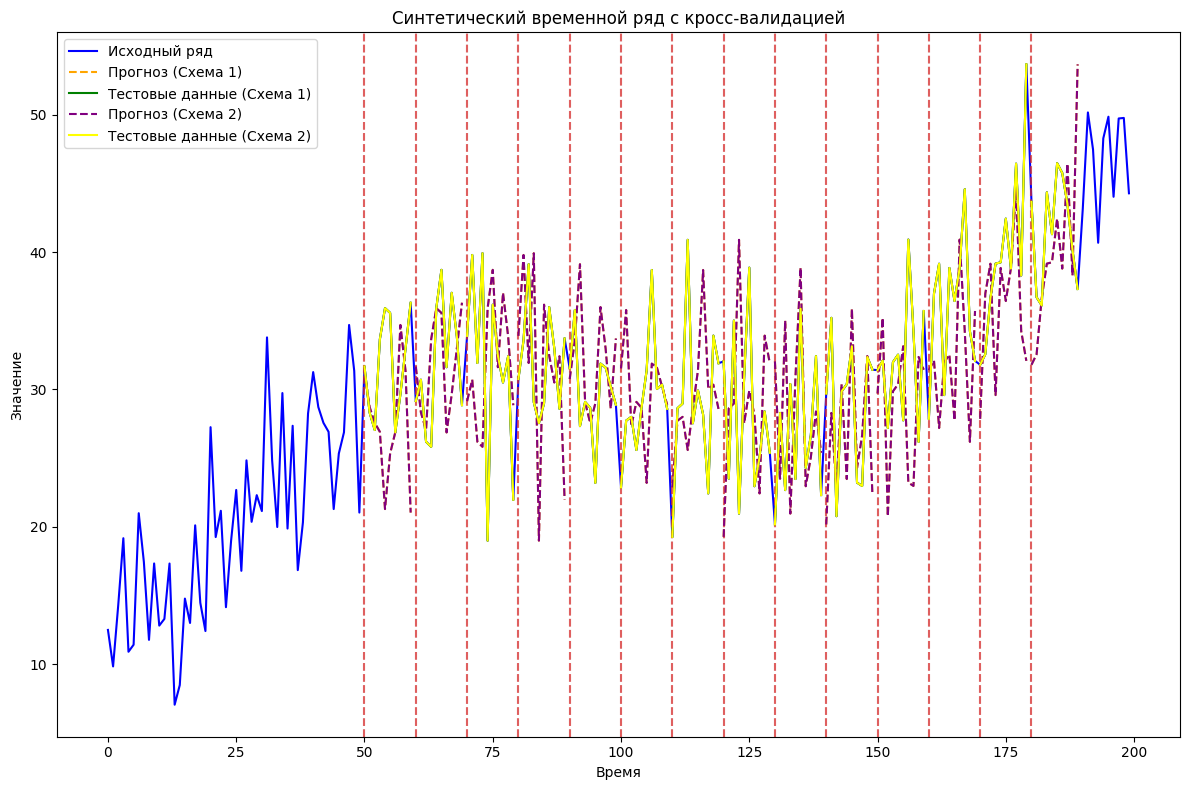

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Генерация синтетического временного ряда
np.random.seed(42)
n = 200  # количество точек
trend = np.linspace(10, 50, n)  # линейный тренд
seasonal = 10 * np.sin(np.linspace(0, 2 * np.pi, n))  # сезонность
noise = np.random.normal(scale=5, size=n)  # случайный шум
data = trend + seasonal + noise

# Функция для реализации схемы 1 (обучение с растущим размером обучающего множества)
def cross_val_scheme_1(data, t, delta_t):
    errors = []
    all_predictions = []  # Для визуализации прогнозов
    for i in range(t, len(data) - delta_t, delta_t):
        train = data[:i]  # обучающее множество
        test = data[i:i + delta_t]  # тестовое множество
        predicted = train[-delta_t:]  # прогноз на основе последнего блока
        error = mean_squared_error(test, predicted)
        errors.append(error)
        all_predictions.append((i, predicted, test))  # Сохраняем информацию для визуализации
    return np.mean(errors), all_predictions

# Функция для реализации схемы 2 (обучение с фиксированным размером обучающего множества)
def cross_val_scheme_2(data, t, delta_t):
    errors = []
    all_predictions = []  # Для визуализации прогнозов
    for i in range(t, len(data) - delta_t, delta_t):
        train = data[i - t:i]  # фиксированное обучающее множество
        test = data[i:i + delta_t]  # тестовое множество
        predicted = train[-delta_t:]  # прогноз на основе последнего блока
        error = mean_squared_error(test, predicted)
        errors.append(error)
        all_predictions.append((i, predicted, test))  # Сохраняем информацию для визуализации
    return np.mean(errors), all_predictions

# Параметры для кросс-валидации
t = 50  # начальное количество точек для обучения
delta_t = 10  # размер тестового интервала

# Применение схемы 1
error_scheme_1, predictions_scheme_1 = cross_val_scheme_1(data, t, delta_t)

# Применение схемы 2
error_scheme_2, predictions_scheme_2 = cross_val_scheme_2(data, t, delta_t)

print(f"Средняя ошибка по схеме 1: {error_scheme_1}")
print(f"Средняя ошибка по схеме 2: {error_scheme_2}")

# Визуализация
plt.figure(figsize=(12, 8))

# Исходный ряд
plt.plot(data, label='Исходный ряд', color='blue')

# Схема 1: вертикальные линии и предсказания
for i, pred, test in predictions_scheme_1:
    plt.axvline(x=i, color='gray', linestyle='--', alpha=0.5)  # Разделение обучающих и тестовых данных
    plt.plot(range(i, i + delta_t), pred, color='orange', linestyle='--', label='Прогноз (Схема 1)' if i == t else "")
    plt.plot(range(i, i + delta_t), test, color='green', linestyle='-', label='Тестовые данные (Схема 1)' if i == t else "")

# Схема 2: вертикальные линии и предсказания
for i, pred, test in predictions_scheme_2:
    plt.axvline(x=i, color='red', linestyle='--', alpha=0.5)  # Разделение обучающих и тестовых данных
    plt.plot(range(i, i + delta_t), pred, color='purple', linestyle='--', label='Прогноз (Схема 2)' if i == t else "")
    plt.plot(range(i, i + delta_t), test, color='yellow', linestyle='-', label='Тестовые данные (Схема 2)' if i == t else "")

plt.title('Синтетический временной ряд с кросс-валидацией')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()




### Резюме: стандартные модели машинного обучения для временных рядов

#### Преимущества:
- **Гибкость в использовании дополнительной информации:** Стандартные модели могут легко интегрировать экзогенные факторы и дополнительные признаки, что способствует повышению точности прогнозов.
- **Модели для множества рядов:** Когда необходимо работать с большим количеством временных рядов, можно использовать одну модель, которая предсказывает несколько рядов одновременно. Например, нейронные сети с несколькими выходами могут быть использованы для прогнозирования продаж различных товаров одновременно.

#### Недостатки:
- **Отсутствие предсказательных интервалов:** Стандартные модели машинного обучения не предоставляют информацию о неопределенности прогноза, так как не строят интервалы доверия.
- **Иногда менее эффективны по сравнению с традиционными моделями:** В некоторых случаях такие модели могут показывать худшие результаты, чем классические методы прогнозирования временных рядов.
- **Сложность в обработке признаков:** Подготовка данных для машинного обучения может быть более сложной по сравнению с методами, специально предназначенными для работы с временными рядами.
- **Трудности интерпретации:** Такие модели, особенно нейронные сети, могут быть трудно интерпретируемыми для конечных пользователей или заказчиков, что затрудняет объяснение результатов.





### Декомпозиция временных рядов

Декомпозиция временного ряда — это метод разложения временного ряда на три компонента:

- **Тренд ($T_t$):** Плавные долгосрочные изменения ряда, отражающие его общую тенденцию.
- **Сезонность ($S_t$):** Повторяющиеся циклические изменения ряда, происходящие с фиксированным периодом (например, сезонные колебания).
- **Ошибка ($R_t$):** Непредсказуемая случайная компонента ряда, которая не может быть объяснена трендом или сезонностью.

В зависимости от типа разложения, можно использовать два подхода:

1. **Аддитивная декомпозиция:** Ряд представляется как сумма компонентов:
 $$
   y_t = T_t + S_t + R_t
$$
2. **Мультипликативная декомпозиция:** Ряд представляется как произведение компонентов:
 $$
   y_t = T_t \cdot S_t \cdot R_t
$$

Чтобы выполнить мультипликативную декомпозицию, можно сначала выполнить аддитивную декомпозицию для логарифма временного ряда:
$$
\log y_t = \log T_t + \log S_t + \log R_t
$$



### Декомпозиция на основе скользящего среднего

Для декомпозиции на основе скользящего среднего, где период сезонности $s$ заранее известен, компоненты разложения вычисляются с использованием следующих шагов:

1. **Тренд (T_t):** Для вычисления тренда используется скользящее среднее с окном длиной $s$:
 $$
   T_t = \frac{1}{s} \sum_{i=t - s/2}^{t + s/2} y_i
$$

2. **Сезонность (S_t):** После удаления тренда вычисляется сезонность:
   - Из ряда вычитаем тренд: $y_t := y_t - T_t$.
   - Формируются $s$ подгрупп, где каждая группа соответствует одному сезону: $G_i = \{ y_i, y_{i+s}, y_{i+2s}, \ldots \}$.
   - Сезонность для каждого сезона вычисляется как среднее значение по соответствующей группе:
 $$
   S_i = \frac{1}{|G_i|} \sum_{y_i \in G_i} y_i
$$

3. **Ошибка (R_t):** Ошибка вычисляется как остаток после вычитания тренда и сезонности:
 $$
   R_t = y_t - T_t - S_t
$$





















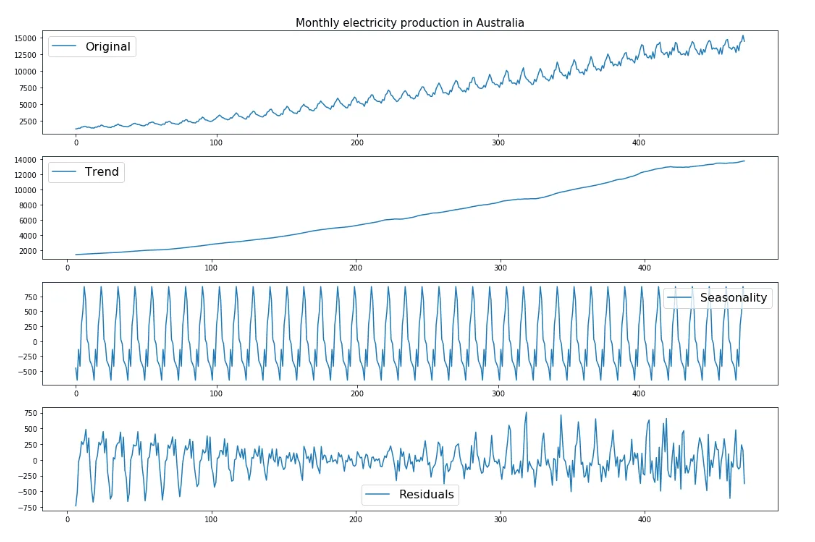


### STL-декомпозиция (Seasonal-Trend decomposition using LOESS)

STL-декомпозиция является более продвинутым методом для разложения временного ряда. LOESS (Locally Weighted Scatterplot Smoothing) — это метод, использующий взвешенную линейную регрессию, где вес объектов пропорционален расстоянию от точки до обучающих данных.

**Принцип работы STL-декомпозиции:**
1. Инициализация тренда значением 0: $T_0 = 0$.
2. Выполнение итераций до сходимости:
   - На каждом шаге из ряда вычитается текущее значение тренда: $y_t := y_t - T_t$.
   - Формируются $s$ подгрупп, каждая из которых содержит данные для одного сезона: $G_i = \{ y_i, y_{i+s}, y_{i+2s}, \ldots \}$.
   - В каждой группе с помощью метода LOESS вычисляется сезонность $S_t$.
   - Полученная сезонность вычитается из ряда: $y_t := y_t - S_t$.
   - С помощью LOESS предсказывается новое значение тренда: $T_t^{k+1}$.

**Замечание:** Метод также учитывает обработку выбросов, что повышает устойчивость модели.



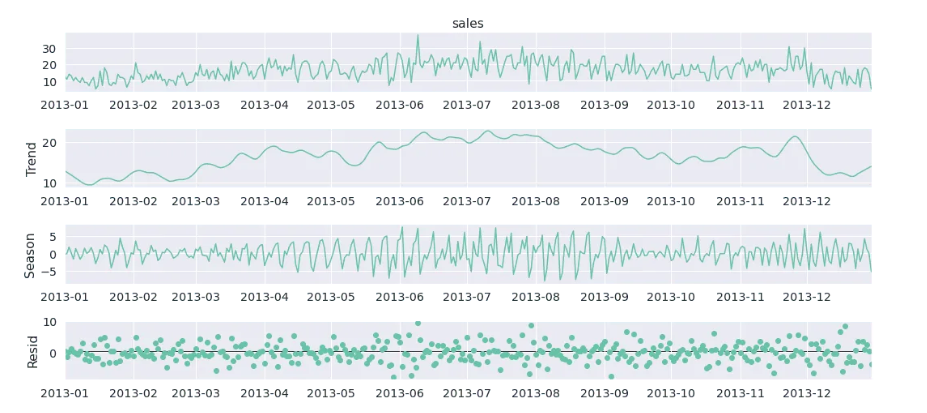

























### Преимущества STL-декомпозиции:
- **Большая гибкость:** STL-декомпозиция имеет больше настраиваемых параметров, что позволяет лучше подогнать модель под особенности данных.
- **Изменяющаяся сезонность:** Сезонная компонента может изменяться с течением времени, и это изменение можно контролировать с помощью параметров модели.
- **Устойчивость к выбросам:** STL-декомпозиция более устойчива к выбросам, что делает её полезной для данных с неидеальными условиями.




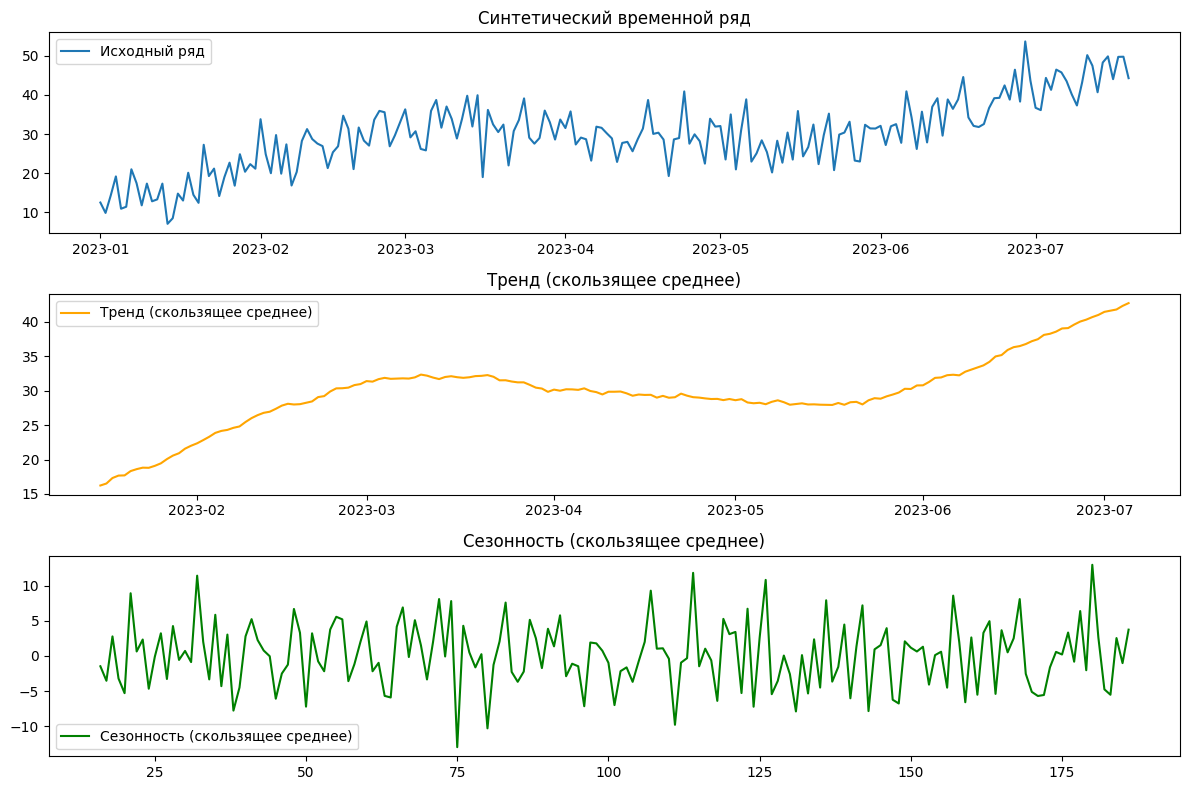

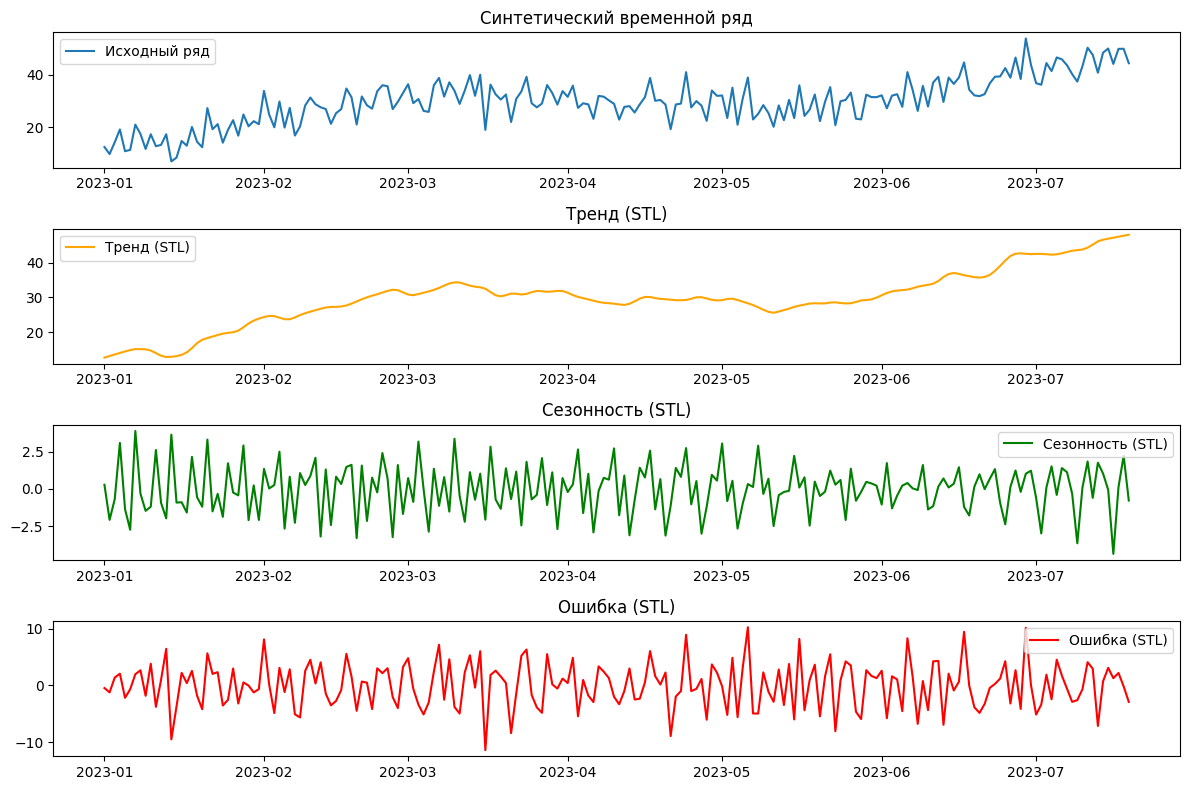

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# 1. Генерация синтетического временного ряда
np.random.seed(42)

# Параметры синтетического ряда
n = 200  # количество точек данных
trend = np.linspace(10, 50, n)  # линейный тренд
seasonal = 10 * np.sin(np.linspace(0, 2 * np.pi, n))  # сезонность с периодом 2pi
noise = np.random.normal(scale=5, size=n)  # случайный шум

# Создаем временной ряд
y = trend + seasonal + noise
time = pd.date_range(start='2023-01-01', periods=n, freq='D')
data = pd.Series(y, index=time)

# 2. Декомпозиция с использованием скользящего среднего
s = 30  # период сезонности
rolling_mean = data.rolling(window=s, center=True).mean()

# Вычисление тренда
trend_sm = rolling_mean
residual_sm = data - trend_sm

# Сезонность (среднее по сезонам)
seasonal_sm = residual_sm.groupby(residual_sm.index.dayofyear).mean()

# Визуализация результата скользящего среднего
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(data, label='Исходный ряд')
plt.title('Синтетический временной ряд')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(trend_sm, label='Тренд (скользящее среднее)', color='orange')
plt.title('Тренд (скользящее среднее)')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(seasonal_sm, label='Сезонность (скользящее среднее)', color='green')
plt.title('Сезонность (скользящее среднее)')
plt.legend()

plt.tight_layout()
plt.show()

# 3. STL-декомпозиция
stl = STL(data, seasonal=13)
result = stl.fit()

# Визуализация результатов STL-декомпозиции
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(data, label='Исходный ряд')
plt.title('Синтетический временной ряд')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Тренд (STL)', color='orange')
plt.title('Тренд (STL)')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Сезонность (STL)', color='green')
plt.title('Сезонность (STL)')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Ошибка (STL)', color='red')
plt.title('Ошибка (STL)')
plt.legend()

plt.tight_layout()
plt.show()

### Пример: Временной ряд с сезонностью и трендом

Предположим, у нас есть следующие данные:

| $t$ | Месяц  | $y_t$ (наблюдения) |
|--|--||
| 1      | Январь | 130                    |
| 2      | Февраль| 140                    |
| 3      | Март   | 150                    |
| 4      | Апрель | 160                    |
| 5      | Май    | 170                    |
| 6      | Июнь   | 180                    |
| 7      | Январь | 135                    |
| 8      | Февраль| 145                    |
| 9      | Март   | 155                    |
| 10     | Апрель | 165                    |
| 11     | Май    | 175                    |
| 12     | Июнь   | 185                    |



### Шаг 1. Найдем тренд

#### Формулы для линейного тренда:
$$
T_t = b + b_t t
$$
Для нахождения коэффициентов $b$ (свободный член) и $b_t$ (наклон):
$$
b_t = \frac{\sum (t - \bar{t})(y_t - \bar{y})}{\sum (t - \bar{t})^2}
$$
$$
b = \bar{y} - b_t \bar{t}
$$

#### Вычисления:

1. Найдем $\bar{t}$ и $\bar{y}$:
   $$
   \bar{t} = \frac{\sum t}{n} = \frac{1 + 2 + \ldots + 12}{12} = \frac{78}{12} = 6.5
   $$
   $$
   \bar{y} = \frac{\sum y_t}{n} = \frac{130 + 140 + \ldots + 185}{12} = \frac{1920}{12} = 160
   $$

2. Вычислим $\sum (t - \bar{t})(y_t - \bar{y})$ и $\sum (t - \bar{t})^2$. Для этого создадим таблицу:

| $t$ | $y_t$ | $t - \bar{t}$ | $y_t - \bar{y}$ | $(t - \bar{t})(y_t - \bar{y})$ | $(t - \bar{t})^2$ |
|--|-|-||--||
| 1      | 130      | -5.5              | -30                 | 165                               | 30.25              |
| 2      | 140      | -4.5              | -20                 | 90                                | 20.25              |
| 3      | 150      | -3.5              | -10                 | 35                                | 12.25              |
| 4      | 160      | -2.5              | 0                   | 0                                 | 6.25               |
| 5      | 170      | -1.5              | 10                  | -15                               | 2.25               |
| 6      | 180      | -0.5              | 20                  | -10                               | 0.25               |
| 7      | 135      | 0.5               | -25                 | -12.5                             | 0.25               |
| 8      | 145      | 1.5               | -15                 | -22.5                             | 2.25               |
| 9      | 155      | 2.5               | -5                  | -12.5                             | 6.25               |
| 10     | 165      | 3.5               | 5                   | 17.5                              | 12.25              |
| 11     | 175      | 4.5               | 15                  | 67.5                              | 20.25              |
| 12     | 185      | 5.5               | 25                  | 137.5                             | 30.25              |

Суммы:
$$
\sum (t - \bar{t})(y_t - \bar{y}) = 450, \quad \sum (t - \bar{t})^2 = 143
$$

3. Найдем $b_t$ и $b$:
$$
b_t = \frac{\sum (t - \bar{t})(y_t - \bar{y})}{\sum (t - \bar{t})^2} = \frac{450}{143} \approx 3.15
$$
$$
b = \bar{y} - b_t \bar{t} = 160 - 3.15 \cdot 6.5 = 160 - 20.475 = 139.525
$$

4. Уравнение тренда:
$$
T_t = 139.525 + 3.15t
$$



### Шаг 2. Найдем сезонность

#### Сезонный компонент $S_t$:
1. Для аддитивной модели:
$$
S_t = y_t - T_t
$$

2. Найдем значения $T_t$ для каждого $t$:

| $t$ | $T_t = 139.525 + 3.15t$ |
|--|--|
| 1      | $139.525 + 3.15 \cdot 1 = 142.675$ |
| 2      | $139.525 + 3.15 \cdot 2 = 145.825$ |
| 3      | $139.525 + 3.15 \cdot 3 = 148.975$ |
| 4      | $139.525 + 3.15 \cdot 4 = 152.125$ |
| 5      | $139.525 + 3.15 \cdot 5 = 155.275$ |
| 6      | $139.525 + 3.15 \cdot 6 = 158.425$ |
| 7      | $139.525 + 3.15 \cdot 7 = 161.575$ |
| 8      | $139.525 + 3.15 \cdot 8 = 164.725$ |
| 9      | $139.525 + 3.15 \cdot 9 = 167.875$ |
| 10     | $139.525 + 3.15 \cdot 10 = 171.025$ |
| 11     | $139.525 + 3.15 \cdot 11 = 174.175$ |
| 12     | $139.525 + 3.15 \cdot 12 = 177.325$ |

3. Найдем $S_t = y_t - T_t$:

| $t$ | $y_t$ | $T_t$ | $S_t = y_t - T_t$ |
|--|-|--|--|
| 1      | 130      | 142.675   | $130 - 142.675 = -12.675$ |
| 2      | 140      | 145.825   | $140 - 145.825 = -5.825$  |
| 3      | 150      | 148.975   | $150 - 148.975 = 1.025$   |
| 4      | 160      | 152.125   | $160 - 152.125 = 7.875$   |
| 5      | 170      | 155.275   | $170 - 155.275 = 14.725$  |
| 6      | 180      | 158.425   | $180 - 158.425 = 21.575$  |

Группируем данные по месяцам, вычисляем средний сезонный индекс.



### Шаг 3. Найдем остаток

Остаток (шум) вычисляется как:
$$
R_t = y_t - (T_t + S_t)
$$



Свободный член (b): 137.50000000000006
Наклон (b_t): 3.076923076923077


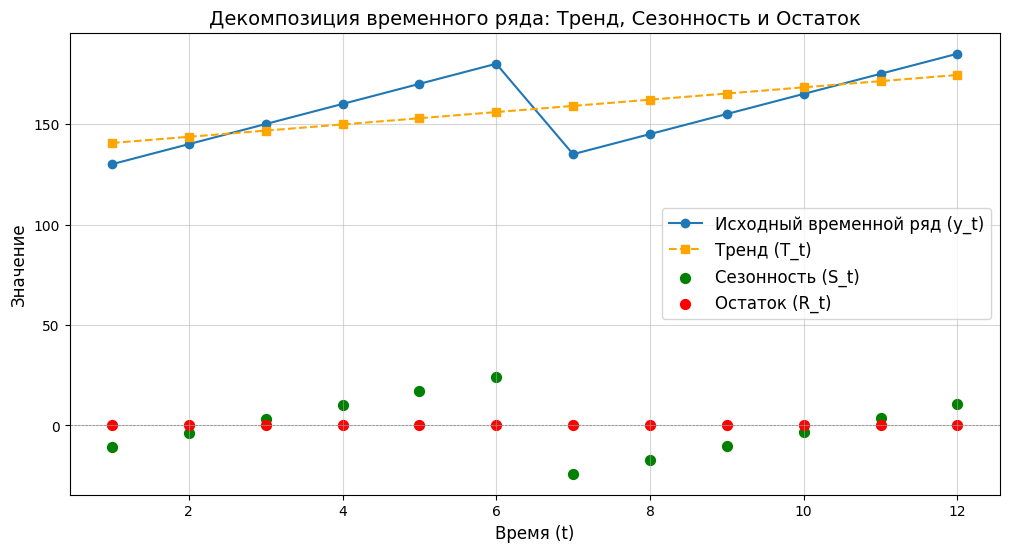

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Данные
t = np.arange(1, 13)  # Временные точки
y_t = np.array([130, 140, 150, 160, 170, 180, 135, 145, 155, 165, 175, 185])  # Исходный ряд

# Добавим столбец единиц для свободного члена (b)
X = np.vstack([np.ones_like(t), t]).T  # Матрица X с константой и t
y = y_t  # Наблюдения y_t

# Решение методом наименьших квадратов
coefficients = np.linalg.lstsq(X, y, rcond=None)[0]  # Найти b и b_t
b, b_t = coefficients

print(f"Свободный член (b): {b}")
print(f"Наклон (b_t): {b_t}")

T_t = b + b_t * t  # Тренд

# Сезонность
S_t = y_t - T_t  # Аддитивная сезонность

# Остаток (шум)
R_t = y_t - (T_t + S_t)

# Визуализация
plt.figure(figsize=(12, 6))

# Исходный временной ряд
plt.plot(t, y_t, label="Исходный временной ряд (y_t)", marker='o')

# Тренд
plt.plot(t, T_t, label="Тренд (T_t)", linestyle='--', color='orange', marker='s')

# Сезонность
plt.scatter(t, S_t, label="Сезонность (S_t)", color='green', s=50)

# Остаток
plt.scatter(t, R_t, label="Остаток (R_t)", color='red', s=50)

# Оформление графика
plt.title("Декомпозиция временного ряда: Тренд, Сезонность и Остаток", fontsize=14)
plt.xlabel("Время (t)", fontsize=12)
plt.ylabel("Значение", fontsize=12)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.show()